<a href="https://colab.research.google.com/github/Renu-code123/Heart-Disease-Prediction-using-ML/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Heart Disease Prediction Project


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('heart.csv')

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['sex'].plot(kind='hist', bins=20, title='sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['cp'].plot(kind='hist', bins=20, title='cp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['trestbps'].plot(kind='hist', bins=20, title='trestbps')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='age', y='sex', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='sex', y='cp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='cp', y='trestbps', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='trestbps', y='chol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['sex'].plot(kind='line', figsize=(8, 4), title='sex')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['cp'].plot(kind='line', figsize=(8, 4), title='cp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['trestbps'].plot(kind='line', figsize=(8, 4), title='trestbps')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from sklearn.model_selection import train_test_split
x,y=df.drop('target',axis=1),df['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=9)

###Scale-Insensitive


In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier()
forest.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_clf=GaussianNB()
nb_clf.fit(x_train,y_train)

GaussianNB()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf=GradientBoostingClassifier()
gb_clf.fit(x_train,y_train)

GradientBoostingClassifier()

##Scale-Sensistive

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.linear_model import LogisticRegression

log_clf=LogisticRegression()
log_clf.fit(x_train_scaled,y_train)

LogisticRegression()

In [ ]:
from sklearn.svm import SVC

svm_clf=SVC()
svm_clf.fit(x_train_scaled,y_train)

SVC()

##Evaluation

In [ ]:
forest.score(x_test,y_test)

0.9853658536585366

In [ ]:
nb_clf.score(x_test,y_test)

0.8463414634146341

In [ ]:
gb_clf.score(x_test,y_test)

0.9707317073170731

In [ ]:
knn_clf.score(x_test_scaled,y_test)

0.8536585365853658

In [ ]:
log_clf.score(x_test_scaled,y_test)

0.8731707317073171

In [ ]:
svm_clf.score(x_test_scaled,y_test)

0.9341463414634147

######Accuracy: 100 ->80 ->80% ->0.80
######Precision: 200 ->200 have diease ->20 ->100 actually have ->50%
#####Recall: 100 patients with heart disease -> 100%

In [ ]:
from sklearn.metrics import recall_score

y_preds=forest.predict(x_test)
print('Forest:',recall_score(y_test,y_preds))

y_preds=nb_clf.predict(x_test)
print('NB:',recall_score(y_test,y_preds))

y_preds=gb_clf.predict(x_test)
print('GB:',recall_score(y_test,y_preds))

y_preds=knn_clf.predict(x_test_scaled)
print('KNN:',recall_score(y_test,y_preds))

y_preds=log_clf.predict(x_test_scaled)
print('Log:',recall_score(y_test,y_preds))

y_preds=svm_clf.predict(x_test_scaled)
print('SVC:',recall_score(y_test,y_preds))

Forest: 0.9859154929577465
NB: 0.9014084507042254
GB: 0.9859154929577465
KNN: 0.8732394366197183
Log: 0.92018779342723
SVC: 0.9530516431924883


###Plot

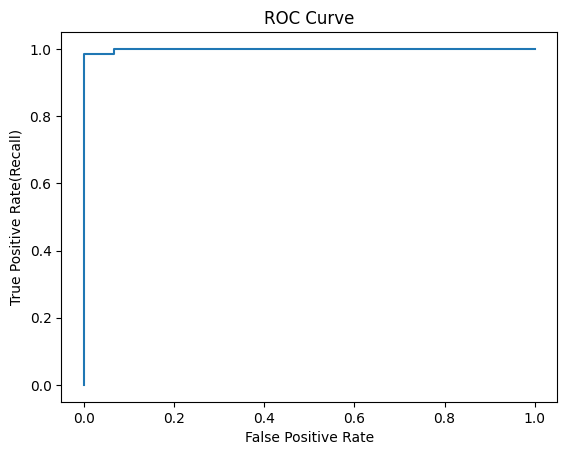

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score

y_probs=forest.predict_proba(x_test)[:,1]

fpr, trp, thresholds=roc_curve(y_test,y_probs)
plt.plot(fpr,trp)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate(Recall)')
plt.title('ROC Curve')
plt.show()

###Predict

In [ ]:
roc_auc_score(y_test,y_probs)

np.float64(0.9990705655251305)

###Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'n_estimators':[100,200,500,600,700],
    #'max_depth': [None,10,20,30],
    #'min_samples_split':[2,5,10],
    #'min_samples_leaf':[1,2,4],
    #'max_features': ['sqrt','log2',None],
}
forest=RandomForestClassifier(n_jobs=-1,random_state=9)

grid_search=GridSearchCV(forest,param_grid,cv=3,n_jobs=-1,verbose=2)

In [ ]:
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=9),
             n_jobs=-1, param_grid={'n_estimators': [100, 200, 500, 600, 700]},
             verbose=2)

In [ ]:
best_forest=grid_search.best_estimator_

In [ ]:
best_forest

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=9)

In [ ]:
best_forest.score(x_test,y_test)

0.9853658536585366

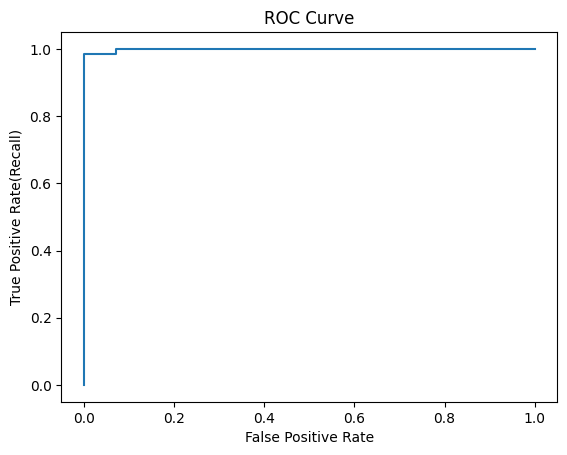

In [ ]:
y_probs=best_forest.predict_proba(x_test)[:,1]

fpr, trp, thresholds=roc_curve(y_test,y_probs)
plt.plot(fpr,trp)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate(Recall)')
plt.title('ROC Curve')
plt.show()

In [ ]:
y_preds=best_forest.predict(x_test)
print('Forest:',recall_score(y_test,y_preds))

Forest: 0.9859154929577465


####Feature Importance

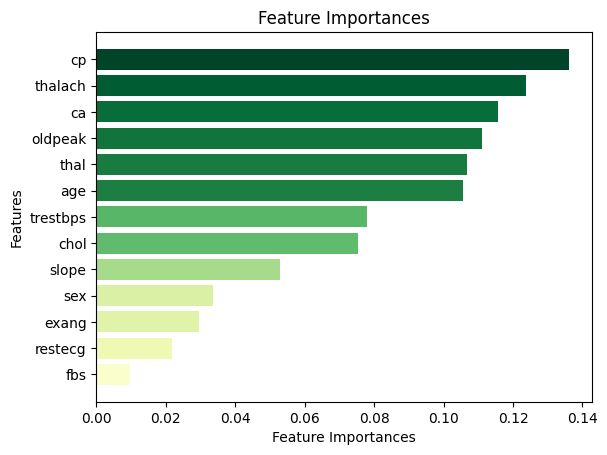

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

feature_importances=best_forest.feature_importances_
features=best_forest.feature_names_in_

sorted_idx=np.argsort(feature_importances)
sorted_features=features[sorted_idx]
sorted_importances=feature_importances[sorted_idx]

# Scale the colors to be between 0 and 1
colors=plt.cm.YlGn(sorted_importances / max(sorted_importances))

plt.barh(sorted_features, sorted_importances, color=colors)
plt.xlabel('Feature Importances')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

####Correlation analysis

<Axes: >

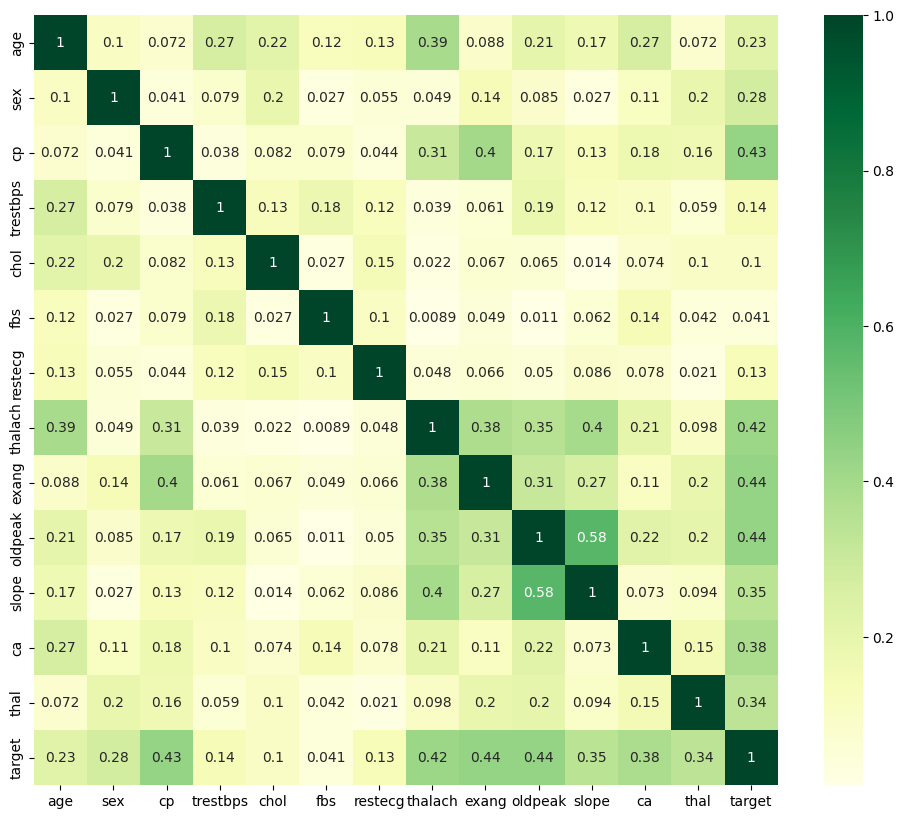

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(abs(df.corr()),annot=True,cmap='YlGn')

In [ ]:
best_forest.predict(x_test_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,